# Hands-on 10: Modulação Digital em canais limitados em banda e Modulação Digital em banda-passante (modulação, demodulação e desempenho em ruído AWGN)

# Objetivos
As metas desse tutorial são ajudar o usuário a:
- Entender os processos de transmissão e recepção de um sinal digital em canais AWGN limitado em banda (caracterização da ISI);
- Entender a traçar e analisar um diagrama de olho (visualização dos efeitos da ISI);
- Entender os processos de transmissão e recepção de um sinal digital em banda-passante;
- Aprender a estimar a PSD de sinais digitais.

# Transmissão e Recepção digital (conceitos básicos)

Uma maneira muito tradicional de mostrar um sistema de comunicação é por meio da cadeia de comunicação digital. Nessa representação, vários blocos funcionais formam a cadeia de transmissão e de recepção. Cada bloco recebe um sinal de entrada, realiza algum processamento e disponibiliza um sinal em sua saída, o qual será entrada do bloco subsequente, como ilustrado na figura a seguir.

![fig_cadeia_digital](../FIGS/HD_09/cadeia_digital.png)

Se a fonte de informação for analógica, será necessário sua digitalização por meio de um conversor A/D. Como mostrado no [Hands-on 06: Transição analógico/digital (amostragem, reconstrução ideal, quantização, codificação PCM e multiplexação TDM)](http://nbviewer.jupyter.org/github/vicentesousa/DCO2004_2022/blob/main/notebooks//h06.ipynb), um sinal contínuo é transformado em uma sequência de bits após os processos de **Amostragem**, **Quantização** e **Codificação**. Essas são as etapas da conversão A/D. Se a fonte já for digital, e.g. um arquivo de texto, é necessário saber qual a formatação dos dados. Neste caso, a formatação é simplesmente uma tabela que mapea cada caracter em uma sequência binária distinta, por exemplo o ASCII (American Standard Code for Information Interchange). Ver tabela [ASCII](http://web.alfredstate.edu/faculty/weimandn/miscellaneous/ascii/ASCII%20Conversion%20Chart.gif). Nessa representação, por exemplo, a letra **A** é a palavra binária de 8 bits: **01000001**.

Se necessário, a **codificação de fonte** comprime os dados almejando eficiência. Já o **codificador de canal** insere bits redundantes para proteger a informação a ser transmitida e diminuir a taxa de erro de bit (BER). Segurança é papel do **Encriptador**.

Se vários sinais precisam ser enviados usando o mesmo meio de transmissão, o **multiplexador** faz o papel de juntar os sinais. 

Se a transmissão for em banda-base (e.g. por meio de cabos), o **modulador digital em banda-base (modulador por pulsos)** é o dispositivo que recebe uma sequência de bits 0's e 1's e a transforma em uma sequência de pulsos (digitais e contínuos no tempo). Assim, o trem de pulsos assume o papel da portadora e a sequência de bits o papel do sinal modulante. Esse tipo de modulação também é chamada de codificação de linha.

Se a transmissão for através de meio sem fio, uma **modulação em banda-passante** é exigida para tornar possível gerar uma onda em alta frequência capaz de, ao injetada em uma antena, se propagar via onda eletromagnética.

# Transmissão banda-base em canais limitados em banda

Dados digitais possuem um espectro amplo com um conteúdo de baixa frequência significativo. Assim, a transmissão em banda-base de sinais digitais exige a utilização de um canal passa-baixas com uma largura de banda grande o suficiente para acomodar o conteúdo de frequência do fluxo da dados que representa a informação a ser transmistida. Entretanto, o canal é geralmente dipersivo, com resposta em frequência diferente de um filtro passa-baixas ideal. Podemos ilustrar esse efeito no canal telefônico via fios de cobre (par trançado). As reatâncias no cabo provocam um espalhamento temporal e o pulso transmitido se alarga no tempo, como ilustra a figura a seguir. O resultado da transmissão de dados em tais canais é que cada pulso recebido é afetado de alguma forma pelos pulsos adjacentes, provocando o surgimento de uma forma comum de interferência, denominada Interferência Intersimbólica (ISI).

![fig_ISI_Tempo](../FIGS/HD_09/ISI_tempo.png)

O mesmo efeito é observado em canais sem fio, devido ao multipercursos da onda eletromagnética. 

Ao observar esse efeito na frequência, podemos modelar o canal dispersivo como um filtro H(f), como ilustrado na figura a seguir para um canal telefônico (par trançado).

![fig_ISI_Tempo](../FIGS/HD_09/ISI_freq.png)

Nesse caso, verifique que devemos ter cuidado com o espectro do pulso a ser usado no transmissor, pois existe uma forte atenuação em frequência próximas a componentes DC e 3,4kHz. Assim, o sistema de comunicação digital pode ser modelado como mostrar a figura a seguir.

![fig_ISI_Tempo](../FIGS/HD_09/ISI_system_model.png)

Esse processo de alargamento do pulso no tempo pode ser gerado mesmo não utilizando um canal dispersivo para transmissão. A própria operação de limitar a banda do pulso, gera um sinal com alargamento temporal. Assim, a formatação do pulso na modulação em banda-base pode causar ISI. Isso será ilustrado na próxima prática.

Existem duas formas de controlar a PSD do sinal digital em banda-base: (i) pelo tipo do código de linha (e.g. RZ, NRZ); e (ii) pela formatação do pulso. Geralmente, codificadores de linhas utilizam pulsos retangulares que são modulados por amplitude, duração e posicionamento. Já na formatação de pulso, outros pulsos, além do retangular, são usados para mudar a PSD do sinal transmitido. Essa é uma forma mais direta e poderosa de ajustar tanto a largura de banda quanto a distribuição da energia do pulso na frequência. Não é escopo desse hands-on comparar os diferentes tipos de código de linhas. Ao invés disso, focaremos em mostrar alguns tipos de formas de pulsos.

# Prática 1: Diagrama de olho para sinais limitados em banda

O **diagrama de olho** é uma ferramenta prática de engenharia muito utilizada para verificar a disposição temporal dos pulsos em uma comunicação digital em banda-base. O digrama de olho é fácil de gerar e permite o exame visual da gravidade da ISI e da imunidade ao ruído. Outra facilidade do diagrama de olho é que ele pode ser gerado em um osciloscópio simples, aplicando a sequência de pulsos na sua entrada vertical e ajustando adequadamente sua base de tempo. A seção 7.6 de [Lathi,B. P., Sistemas de Comunicações Analógicos e Digitais Modernos - 4ª Ed, LTC, 2012](https://www.saraiva.com.br/sistemas-de-comunicacoes-analogicos-e-digitais-modernos-4-ed-4050553.html) traz mais detalhes sobre esse processo. A figuras aseguir mostra uma representação do diagrama de olho, evidenciando o significado de alguns pontos de inspesão visual.

![fig_ISI_Tempo](../FIGS/HD_09/olho.png)

Veja que vários parâmetros e medidas de qualidade da transmissão podem ser extraídas do diagrama de olho. Para mais exemplos, por favor, consulte o material do [Prof. Gil Pinheiro, Análise Estatística de Sistemas de Comunicação Digitais – Usando o Diagrama de Olho, 2010.](http://www.lee.eng.uerj.br/~gil/filas/Diagrama%20de%20Olho.pdf)

O próximo experimento tem como objetivo comparar o sinal no tempo e o diagrama de olho de algumas formas de onda com e sem ruído.

**Passo 01:** Abra um script no Jupyter Notebook, salve-o como **handson10_1.py** e escreva o seguinte código:

C:\Users\leona\AppData\Local\Temp/ipykernel_5556/1673802158.py:37: RuntimeWarning: divide by zero encountered in true_divide
  b[mask] = np.sinc(2*fc*nind)/fs * np.cos(2*np.pi*R*fc*nind)/(1.0 - (4*R*fc*nind)**2)


ValueError: x has 64 columns but y has 197 columns

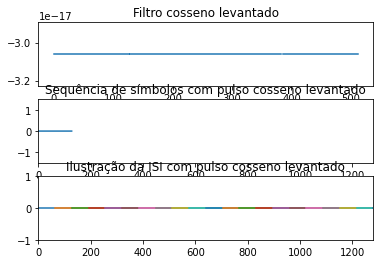

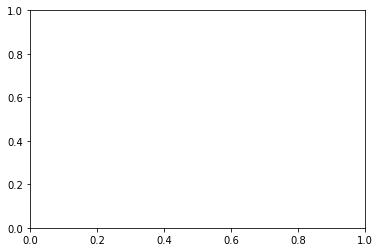

In [20]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


def rcosfir(r, N_T, rate, T):
    if isinstance(N_T, int):
        N_T = np.hstack((N_T, N_T))
    N_T[0] = -abs(N_T[0])
    time_T = np.arange(0, 1/rate, max(N_T[1], abs(N_T[0])))
    b=firrcos(rate*(N_T[1]-N_T[0]),1/(2*T),r,rate/T,-N_T[0]*rate)*rate
    return b


def firrcos(N, fc, R, fs, delay):
    # Check if the filter order is a positive, even integer
    assert (N >= 0) and (N % 2 == 0)
    # Cast to enforce Precision Rules
    L = N+1 # Length of window
    # Check for valid cutoff frequency
    assert 0 < fc < fs/2
    # Check for valid rolloff values
    # check if input arguments are valid 
    # assert 0 >= R <= 1
    # check for range of input arguments
    assert (fc + R*fc) <= fs/2
    assert 0 <= delay <= L
    n = (np.arange(L)-delay) / fs
    return normal_design(n,fc,fs,R)


def normal_design(n,fc,fs,R):
    mask = np.isclose(abs(abs(4*R*fc*n) - 1.0), 0)
    b = np.zeros(n.shape)
    if mask.any():
        nind = n[mask]
        b[mask] = np.sinc(2*fc*nind)/fs * np.cos(2*np.pi*R*fc*nind)/(1.0 - (4*R*fc*nind)**2)
    b[np.invert(mask)] = R / (2*fs) * np.sin(np.pi/(2*R))
    return 2*fc*b


def eyediagram(x, n, period=None, offset=None):
    """Draw the eye diagram using all parts of the given signal x"""
    if period is None:
        period = n
    if offset is None:
        offset = n
    t = np.tile(np.arange(-period/2, period/2), (n, 1))
    if len(x) % n > 0:
        x = np.hstack((x, np.zeros(n - (len(x) % n))))
    y = np.reshape(x, (-1, n)).T
    plt.figure()
    plt.plot(t, y, 'b-')
    plt.ylim((-np.max(np.abs(x)),np.max(np.abs(x))))
    plt.tight_layout()


def upsample(signal, rate):
    ret = np.zeros(rate*len(signal))
    ret[::rate] = signal
    return ret


peSim = 64                                        # Período do símbolo (amostras/símbolo)
nsCL = 4                                          # Número de símbolos o cosseno levantado se espalhará (ISI)
roff = 0.25                                       # Fator de decaimento do cosseno levantado
nSimbs = 400                                      # Número de símbolos transmitidos 
vtSim = 2*stats.randint.rvs(0, 2, size=nSimbs)-1  # Símbolos
dup = upsample(vtSim, peSim)                      # Símbolos (sobreamostragem)
hrc = rcosfir(roff, nsCL, peSim, 1)               # Cosseno levantado
yrcosAll = np.convolve(dup, hrc)                  # Símbolos transmitidos com o cosseno levantado
yrcos = yrcosAll[2*nsCL*peSim-1:-2*nsCL*peSim]    # Trem de pulso cosseno levantado


# Configuração dos gráficos no tempo
nSim2Plot = 20                                    # Número de símbolos para o gráfico no tempo

# gráfico pulso cosseno levantado
plt.subplot(3, 1, 1)
plt.plot(hrc)
plt.title('Filtro cosseno levantado')
plt.subplot(3, 1, 2)
plt.plot(yrcosAll[:nSim2Plot*peSim])
plt.title('Sequência de símbolos com pulso cosseno levantado')
plt.axis([0, peSim*nSim2Plot, -1.5, 1.5])
plt.subplot(3, 1, 3)
t = np.arange(len(hrc))
for i, symbol in enumerate(vtSim):
    plt.plot(t + i*peSim, symbol*hrc)
plt.axis([0, peSim*nSim2Plot, -1, 1])
plt.title('Ilustração da ISI com pulso cosseno levantado')

# Diagrama de olho
eyediagram(yrcos, 2*peSim, peSim)                  # Diagrama de olho do cosseno levantado
plt.title('Diagrama de olho do pulso cosseno levantado')

#
# Pulso retangular
hT = np.ones(1, peSim)                             # Pulso retangular do transmissor (NRZ)
# Aplicando o pulso a sequência de símbolos 
ynrzAll = np.convolve(dup, hT)                     # Símbolos transmitidos com pulso retangular
ynrz = ynrzAll[:-peSim]                            # retira o último símbolo


# gráfico pulso rentangular
plt.figure()
plt.subplot(2, 1, 1)
thT = np.arange(-peSim/2, peSim/2)
plt.stairs(np.hstack(([thT[0]-1], thT, [thT[-1]+1])),np.hstack(([0], hT, [0])))
plt.title('Filtro retangular')
plt.subplot(2, 1, 2)                               # Número de símbolos para o gráfico no tempo
plt.plot(ynrzAll[:nSim2Plot*peSim])
plt.title('Sequência de símbolos com pulso retangular')

# Diagrama de olho
eyediagram(ynrz, 2*peSim, peSim)                   # Diagrama de olho do cosseno levantado
plt.title('Diagrama de olho do pulso rentagular')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')

#
# Pulso meia senoide
hSin = sin(pi*np.arange(peSim)/peSim)              # Pulso meia senoide
# Aplicando o pulso a sequência de símbolos 
ysinAll = conv(dup, hSin)                          # Símbolos transmitidos com pulso meia senoide
ysin = ysinAll[:-peSim]                            # retira o último símbolo


# gráfico pulso meia senoide
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(hSin)
plt.title('Filtro meia senoide')
plt.subplot(2, 1, 2)                               # Número de símbolos para o gráfico no tempo
plt.plot(ysinAll[:nSim2Plot*peSim])
plt.title('Sequência de símbolos com pulso meia senoide')

# Diagrama de olho
eyediagram(ysin, 2*peSim, peSim)                   # Diagrama de olho do pulso meia senoide
plt.title('Diagrama de olho do pulso meia senoide')
plt.xlabel('Amostras')
plt.ylabel('Amplitude')
plt.show()

### Comentários sobre o código

- Inicialmente, alguns parâmetros de entrada são definidos.  O período do pulso é **peSim** e o número de símbolos é  **nSimbs**. Dois parâmetros extras são definidos para pulsos cosseno levantado: (i) o fator de roll-off (**roff**); e (ii) o número de símbolos (**nsCL**) subsequentes o sinal no tempo do cosseno levantado se espalhará, causando ISI.

```
peSim = 64        # Período do símbolo (amostras/símbolo)
nsCL = 4          # Número de símbolos o cosseno levantado se espalhará (ISI)
roff = 0.25       # Fator de decaimento do cosseno levantado
nSimbs = 400      # Número de símbolos transmitidos 
```

- Os **nSimbs** símbolos são gerados em **vtSim** e são sobreamostrados em **dup**. Aqui as **peSim** amostras são criadas em cada símbolo.

```
peSim = 64                                        # Período do símbolo (amostras/símbolo)
nSimbs = 400                                      # Número de símbolos transmitidos 
vtSim = 2*stats.randint.rvs(0, 2, size=nSimbs)-1  # Símbolos
dup = upsample(vtSim, peSim)                      # Símbolos (sobreamostragem)
```

- Cada pulso é gerado e convolvido com a sequência de símbolos sobreamostrada. Veja que a parte inicial e final de algumas sequências precisam ser descartadas, pois representam a calda da convolução.

```
...
dup = upsample(vtSim, peSim)                    # Símbolos (sobreamostragem)
...
hrc = rcosfir(roff, nsCL, peSim, 1)             # Cosseno levantado
yrcosAll = np.convolve(dup, hrc)                # Símbolos transmitidos com o cosseno levantado
yrcos = yrcosAll[2*nsCL*peSim-1:-2*nsCL*peSim]  # Trem de pulso cosseno levantado
...
# Pulso retangular
hT = np.ones(1, peSim)                          # Pulso retangular do transmissor (NRZ)
# Aplicando o pulso a sequência de símbolos 
ynrzAll = np.convolve(dup, hT)                         # Símbolos transmitidos com pulso retangular
ynrz = ynrzAll[:-peSim]                         # retira o último símbolo                    
...
# Pulso meia senoide
hSin = sin(pi*np.arange(peSim)/peSim)           # Pulso meia senoide
# Aplicando o pulso a sequência de símbolos 
ysinAll = np.convolve(dup, hSin)                       # Símbolos transmitidos com pulso meia senoide
ysin = ysinAll[:-peSim]                         # retira o último símbolo                   
```
- Os gráficos no tempo e o diagrama de olho são mostrados para cada pulso. Para os gráficos no tempo, o parâmetro **nSim2Plot** controla o número de pulsos que será mostrado no gráfico. Isso é importante para que posssamos distinguir o que realmente está acontencedo na formatação do pulso, algo impossível de se fazer ao construir o gráfico temporal como uma grande quantidade de pulsos.

Nesse experimento, como não modelamos o ruído AWGN, os olhos estão bem abertos. Um caso especial é o diagrama de olho para o caso do cosseno levantado, pois já apresenta o olho um pouco fechado devido ao espalhamento temporal dos símbolos, definido no parâmetro **nsCL**.

Agora vamos fazer o experimento do pulso cosseno levantado sujeito a ruído AWGN.

**Passo 02:** Abra um script no Jupyter Notebook, salve-o como **handson10_2.py** e escreva o seguinte código:

In [33]:
import matplotlib.pyplot as plt
import numpy as np


peSim = 64                                        # Período do símbolo (amostras/símbolo)
nsCL = 4                                          # Número de símbolos o cosseno levantado se espalhará (ISI)
EbNo_dB = 30                                      # Eb/No da simulação (somente um valor)
EbNo = 10**(EbNo_dB/10)                           # Eb/No em escala linear
T = 0.1                                           # Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T/64                                         # Tempo de amostragem do pulso (amostras/seg)
roff = 0.25                                       # Fator de decaimento do cosseno levantado
nSimbs = 400                                      # Número de símbolos transmitidos 
vtSim = 2*stats.randint.rvs(0, 2, size=nSimbs)-1  # Símbolos
dup = upsample(vtSim,peSim)                       # Símbolos (sobreamostragem)
hrc = np.sqrt(1/T)*rcosfir(roff, nsCL, peSim,1)
yrcosAll = np.convolve(dup,hrc)                   # Símbolos transmitidos com o cosseno levantado
yrcos = yrcosAll[2*nsCL*peSim-1:-2*nsCL*peSim]    # Trem de pulso cosseno levantado


#
# Canal AWGN 
Eb = sum(np.dot(hrc, hrc.T)) / len(hrc)
No = Eb/EbNo
vtN = np.sqrt(1/Ts*No/2)*stats.norm.rand(len(yrcosAll))
# Sinal recebido com ruído AWGN
yrcosAlln = yrcosAll + vtN 
yrcosn = yrcos + vtN[2*nsCL*peSim:-2*nsCL*peSim]


#
# Diagrama de olho
eyediagram(yrcosn, 2*peSim,peSim)                  # Diagrama de olho do cosseno levantado
plt.title('Diagrama de olho do pulso com ruído')
eyediagram(yrcos, 2*peSim,peSim)                   # Diagrama de olho do cosseno levantado
plt.title('Diagrama de olho do pulso cosseno levantado')

#
# Configuração dos gráficos no tempo
nSim2Plot = 10                                     # Número de símbolos para o gráfico no tempo
plt.figure()
# gráfico pulso cosseno levantado
plt.subplot(1,2,1)
plt.plot(yrcosAll[:nSim2Plot*peSim])
plt.title('Sequência de símbolos com pulso cosseno levantado')
plt.subplot(1,2,2)
plt.plot(yrcosAlln[:nSim2Plot*peSim])
plt.title('Sequência de símbolos com ruído')

plt.show()

C:\Users\leona\AppData\Local\Temp/ipykernel_5556/1673802158.py:37: RuntimeWarning: divide by zero encountered in true_divide
  b[mask] = np.sinc(2*fc*nind)/fs * np.cos(2*np.pi*R*fc*nind)/(1.0 - (4*R*fc*nind)**2)


TypeError: 'numpy.float64' object is not iterable

### Comentários sobre o código

- Esse experimento é o mesmo realizado anteriormente, mas restringindo ao pulso cosseno levantado e aplicando ruído AWGN ao sinal recebido.

Como é possivel notar na figura do diagrama de olho, o ruído afeta muito a abertura do diagrama.


# Prática 02: Transmissão digital em banda-passante

Como já explicado no começo do hands-on, se a transmissão digital for através de meio sem fio (almejando alcançar longa distância), uma **modulação em banda-passante** é exigida para tornar possível gerar uma onda em alta frequência, que ao ser injetada em uma antena é capaz se propagar via onda eletromagnética.

Esse experimento visa realizar uma prototipagem mais abrangente do sistema de comunicação digital ao incluir modulação em banda passante. A geração de informação já será uma sequência aleatória de bits. Codificação de fonte, Codifcação de canal, Multiplexação e Encriptação não serão modelados. O pulso de formatação da modulação em banda-base será um pulso retangular. Para modulação em banda-passante utilizaremos uma onda senoidal antipodal para representar $s_0(t)$ e $s_1(t)$. A figura a seguir mostra novamente a cadeia de transmissão digital, indicando os 6 pontos em que iremos mostrar graficamente as formas de onda no tempo e frequência. Caso, seja uma onda digital binária, mostraremos a sequência de bits que a representa.

![fig_cadeia_digital](../FIGS/HD_09/cadeia_digital_pontos.png)


**Passo 01:** Começaremos modelando a cadeida de transmissão e mostrando os sinais no tempo. Abra um script no Jupyter Notebook, salve-o como **handson10_3.py** e escreva o seguinte código:

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

def upsample(signal, rate):
    ret = np.zeros(rate*len(signal))
    ret[::rate] = signal
    return ret

# Parâmetros
EbNo_dB = 20                      # Eb/No da simulação (somente um valor)
EbNo = 10**(EbNo_dB/10)           # Eb/No em escala linear
# Transmitir 1 quadro de Na bits com nSamp amostras
Na = 1000                         # Número de bits por quadro
nAmoSim = 256                     # Número de amostras por símbolo 
T = 0.05                          # Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T / nAmoSim                  # Tempo de amostragem do pulso (amostras/seg)
Ns = Na * nAmoSim                 # Número de amostras
t = np.arange(0, Ns)*Ts           # Eixo do tempo 

# 
# Transmissor
vtSimbolos = [-1, 1]              # Símbolos (BPSK)
vtBin = stats.randint.rvs(0, 2, size=Na) # Vetor com bits
# Energia do bit
Eb = sum(np.dot(vtSimbolos, vtSimbolos.T)) / len(vtSimbolos)  
vtTxSim = vtSimbolos[vtBin]     # Mapeamento bit para símbolo
# Codificação de linha (modulação em banda-base)
hT = 1/np.sqrt(T)*np.ones(nAmoSim)   # Pulso retangular do transmissor (NRZ)
# Aplicando o pulso a sequência de símbolos 
vtTxBB = np.convolve(upsample(vtTxSim, nAmoSim), hT)        
vtTxBB = vtTxBB[:Ns]             # Truncando para o número de amostras original 
# Modulação em banda-passante
fc = 400                          # Frequência da portadora [Hz]
vtTxBP = vtTxBB * np.sqrt(2) * np.cos(2*np.pi*fc*t)  # Modulator (portadora de potência 1)


#
# Canal AWGN 
No = Eb/EbNo
# Sinal recebido
vtRxBP =  vtTxBP + np.sqrt(1/Ts*No/2)*np.stats.rand(size=len(vtTxBP))


#
# Gráficos
plt.figure()
nPontos = 5                      # Plotar somente os nPontos iniciais
# Bits
plt.subplot(6,1,1)
tBits = np.arange(nPontos)*Ts*nAmoSim
plt.stem(tBits,vtBin[:nPontos])
plt.title("Sequência de {} bits transmitidos".format(nPontos))
plt.xlabel('Tempo [s]')


# 
# Símbolos
plt.subplot(6,1,2)
tSim = np.arange(nPontos)*Ts*nAmoSim
plt.stem(tSim,vtTxSim[:nPontos])
plt.title("Sequência de {} bits transmitidos".format(nPontos))
plt.xlabel('Tempo [s]')


#
# Pulso
plt.subplot(6,1,3)
thT = np.arange(-nAmoSim/2, nAmoSim/2)*Ts
plt.stairs(np.hstack((thT[0]-Ts, thT, thT[-1]+Ts),np.hstack((0, hT, 0))
plt.title('Pulso retangular do transmissor')
plt.xlabel('Tempo [s]')
plt.xlim(-nAmoSim*Ts, nAmoSim*Ts)
plt.ylim(0, 1/np.sqrt(T)])


#
# Codificador de linha (modulação em banda-base)
plt.subplot(6,1,4)
tMod = np.arange(nPontos*nAmoSim)*Ts
plt.stairs(tMod,vtTxBB[:nPontos*nAmoSim])
plt.title('Sequência de símbolos moduladada em banda-base (codificação de linha)')
plt.xlabel('Tempo [s]')


#
# Modulador em banda-passante
plt.subplot(6,1,5)
plt.stairs(tMod,vtTxBP[:nPontos*nAmoSim])
plt.title('Sequência de símbolos moduladada em banda-passante')
plt.xlabel('Tempo [s]')
# Sinal recebido (canal AWGN)
plt.subplot(6,1,6)
plt.stairs(tMod,vtRxBP[:nPontos*nAmoSim])
plt.title('Sequência de símbolos recebida (canal AWGN)')
plt.xlabel('Tempo [s]')

plt.show()

SyntaxError: invalid syntax (Temp/ipykernel_5556/2325665687.py, line 71)

### Comentários sobre o código

- Com o objetivo é traçar as curvas da sequência de símbolos e os sinais modulados correspondentes, a simulação é feita para um nível único de $E_b/N_0$, definido no parâmetro **EbN0_dB**. Outros parâmetros importantes são: O número de bits a simular (**Na**), o número de amostras por símbolo (**nAmoSim**), o tempo de símbolo **T**. Com esses parâmetros podemos calcular algumas informações importantes para gerar os sinais.

```
# Parâmetros
EbNo_dB = 20                      # Eb/No da simulação (somente um valor)
EbNo = 10**(EbNo_dB/10)           # Eb/No em escala linear
# Transmitir 1 quadro de Na bits com nSamp amostras
Na = 1000                         # Número de bits por quadro
nAmoSim = 256                     # Número de amostras por símbolo 
T = 0.05                          # Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T / nAmoSim                  # Tempo de amostragem do pulso (amostras/seg)
Ns = Na * nAmoSim                 # Número de amostras
t = np.arange(0, Ns)*Ts           # Eixo do tempo 
```

- A modelagem do transmissor começa com a geração de bits (**vtBin**) e seu mapeamento em símbolos da modulação correspondente (símbolos BPSK), gerando o vetor **vtTxSim**. Esses vetores são mostrados graficamente em função do tempo para um número **nPontos** de amostras (parâmetro de entrada).

```
# Transmissor
vtSimbolos = [-1, 1]                     # Símbolos (BPSK)
vtBin = stats.randint.rvs(0, 2, size=Na) # Vetor com bits
...
vtTxSim = vtSimbolos[vtBin]              # Mapeamento bit para símbolo
```

- A modulação em banda-base é feita por meio de pulsos retangulares (NRZ). O pulso é gerado no vetor **hT** e o sinal em banda-base **vtTxBB** é gerado pela convolução do pulso com a sequência de símbolos sobreamostrado pelo fator **nAmoSim**. A função de convolução gera um número maior de amostras que o dos vetores de entrada. Para manter o número de amostras **Ns**, o vetor resultante é truncado em **Ns** amostras.

```
# Codificação de linha (modulação em banda-base)
hT = 1/np.sqrt(T)*np.ones(nAmoSim)   # Pulso retangular do transmissor (NRZ)
# Aplicando o pulso a sequência de símbolos 
vtTxBB = np.convolve(upsample(vtTxSim, nAmoSim), hT)        
vtTxBB = vtTxBB[:Ns]                 # Truncando para o número de amostras original 

```

- A modulação em banda-passante é realizada por uma portadora senoidal de frequência **fc** com amplitude normalizada para resultar em potência igual a 1.

```
# Modulação em banda-passante
fc = 400                                             # Frequência da portadora [Hz]
vtTxBP = vtTxBB * np.sqrt(2) * np.cos(2*np.pi*fc*t)  # Modulator (portadora de potência 1)
```

- O sinal recebido é sujeito a um canal AWGN, gerado de maneira a obedecer um nível de $E_b/N_0$ de entrada.

```
# Parâmetros
EbNo_dB = 20                      # Eb/No da simulação (somente um valor)
EbNo = 10**(EbNo_dB/10)           # Eb/No em escala linear
...
# Energia do bit
Eb = sum(np.dot(vtSimbolos, vtSimbolos.T)) / len(vtSimbolos)   
...
# Canal AWGN 
No = Eb/EbNo
# Sinal recebido
vtRxBP =  vtTxBP + np.sqrt(1/Ts*No/2)*np.stats.rand(size=len(vtTxBP))
```

- O restante do código é destinado a construção dos gráficos nos pontos indicados na figura ilustrativa da cadeia de transmissão digital.


Esse experimento é bem ilustrativo da sequência de sinais gerados na cadeia de transmissão até o ponto de recepção. Note que a degradação devido ao ruído pode ser bastante signficativa dependedo da $E_b/N_0$. Mude o valor da $E_b/N_0$ e veja o resultado na onda recebida.

**Passo 02:** Agora continuaremos modelando a cadeida de transmissão, mas estamos interessados nos espectros dos sinais modulados em banda-base e em banda-passante. A frequência da portadora é configurada em **fc**, parâmetro importante para o espectro do sinal em banda-passante. Abra um script no Jupyter Notebook, salve-o como **handson10_4.py** e escreva o seguinte código:

ValueError: x and y must have same first dimension, but have shapes (2,) and (128000,)

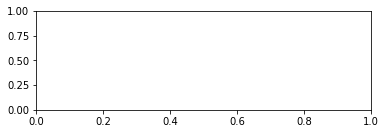

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


def upsample(signal, rate):
    ret = np.zeros(rate*len(signal))
    ret[::rate] = signal
    return ret


EbNo_dB = 20                      # Eb/No da simulação (somente um valor)
EbNo = 10**(EbNo_dB/10)           # Eb/No em escala linear
# Transmitir Nf quadros de Na bits com nSamp amostras
Nf = 10                           # Número de quadros a simular
Na = 1000                         # Número de bits por quadro
nAmoSim = 128                     # Número de amostras por símbolo
T = 0.01                          # Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T / nAmoSim                  # Tempo de amostragem do pulso (amostras/seg)
Ns = Na * nAmoSim                 # Número de amostras
fc = 400                          # Frequência da portadora [Hz] - modulação em banda-passante
t = np.arange(Ns)*Ts              # Eixo do tempo
vtPSDSimBB = np.zeros(Ns)         # Vetor com a PSD simulada (estimada nos Nf quadros)-Banda-base
vtPSDSimBP = np.zeros(Ns)         # Vetor com a PSD simulada (estimada nos Nf quadros)-Banda-passante


#
# Transmissor
vtSimbolos = np.array([-1, 1])    # Símbolos (BPSK)


for _ in range(Nf):               # Loop para cada quadro
    #
    vtBin = stats.randint.rvs(0, 2, size=Na) # Vetor com bits
    # Energia do bit
    Eb = np.sum(np.dot(vtSimbolos, vtSimbolos.T)) / len(vtSimbolos)
    vtTxSim = vtSimbolos[vtBin]     # Mapeamento bit para símbolo
    # Codificação de linha (modulação em banda-base)
    hT = 1/np.sqrt(T)*np.ones(nAmoSim)   # Pulso retangular do transmissor (NRZ)
    # Aplicando o pulso a sequência de símbolos (sinal em banda-base)
    vtTxBB = np.convolve(upsample(vtTxSim, nAmoSim), hT)
    vtTxBB = vtTxBB[:Ns]             # Truncando para o número de amostras original
    # Modulação em banda-passante (portadora com potência 1)
    vtTxBP = vtTxBB * np.sqrt(2) * np.cos(2*np.pi*fc*t)  
    #
    # Estimação da PSD via fft (sinal em banda-base)
    vtSpecBB = np.fft.fftshift(np.fft.fft(vtTxBB))
    # PSD do sinal em banda-base
    vtPSDSimBB = vtPSDSimBB + (vtSpecBB*np.conj(vtSpecBB) * Ts / Ns) 
    # Calcula a estimativa da PSD do sinal em banda-passante
    vtSpecBP = np.fft.fftshift(np.fft.fft(vtTxBP))
    vtPSDSimBP = vtPSDSimBP + (vtSpecBP*np.conj(vtSpecBP) * Ts / Ns) 


#
# Gráficos da PSD do sinal em banda-base
plt.figure()
plt.subplot(2,1,1)


xFreq = np.arange(-1/(2*Ts), 1/(Ns*Ts), 1/(2*Ts)-(1/(Ns*Ts)))
# PSD teórica do pulso rentangular
VfTheo = (1/np.sqrt(T))*(T*np.sinc(T*xFreq))
PSDTheo = VfTheo**2/T


# PSD estimada pelas amostras do sinal
plt.plot(xFreq,10*np.log10(vtPSDSimBB/Nf))


# PSD teórica
plt.plot(xFreq,10*np.log10(PSDTheo),'r')
title('PSD do sinal em banda-base (pulso retangular)')
legend('PSD Simulada','PSD Teórica do pulso retangular')
xlabel('Frequência')
ylabel('PSD [dB]')
plt.xlim(-2*fc, 2*fc)
plt.ylim(-50, 10)
# Gráficos da PSD do sinal em banda-passante
plt.subplot(2,1,2)
# PSD estimada pelas amostras do sinal 
plt.plot(xFreq,10*np.log10(vtPSDSimBP/Nf))
plt.title('PSD do sinal em banda-pasante (pulso retangular)')
plt.legend('PSD Simulada - Banda-Passante')
plt.xlabel('Frequência')
plt.ylabel('PSD [dB]')
plt.xlim(-2*fc, 2*fc)
plt.ylim(-50, 10)

plt.show()

### Comentários sobre o código

- O núcleo do código desse experimento é exatamente igual ao anterior. As mudanças residem no cálculo e mostra dos gráficos, os quais, agora, são na frequência. Sabendo que a PSD de um pulso retangular é uma função sinc, estimamos a PSD das amostras do sinal gerado e a comparamos com a formulação teórica. Uma estimativa é feita para cada quadro de **Na** bits e um número **Nf** de quadros são simulados.

```
Nf = 10                           # Número de quadros a simular
Na = 1000                         # Número de bits por quadro
...
# Estimação da PSD via fft (sinal em banda-base)
vtSpecBB = fftshift(fft(vtTxBB))
# PSD do sinal em banda-base
vtPSDSimBB = vtPSDSimBB + (vtSpecBB*np.conj(vtSpecBB) * Ts / Ns) 
...
xFreq = np.arange(-1/(2*Ts), 1/(Ns*Ts), 1/(2*Ts)-(1/(Ns*Ts)))
# PSD teórica do pulso rentangular
VfTheo = (1/sqrt(T))*(T*np.sinc(T*xFreq))
PSDTheo = VfTheo**2/T
```

- Vemos que para Nf = 10 quadros, já temos uma boa estimativa da PSD. Coloque no número de quadros para 1 e veja a diferença na estimação da PSD. Também aumente para 1000 e veja o resultado.


**Passo 03:** Agora modelaremos transmissor e receptor juntos (a cadeida completa) e estamos interessados em saber se o processo de recepção está realizado corretamente. Abra um script no Jupyter Notebook, salve-o como **handson10_5.py** e escreva o seguinte código:

In [31]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


def qfunc(x):
    return 0.5-0.5*scipy.special.erf(x/np.sqrt(2))


def upsample(signal, rate):
    ret = np.zeros(rate*len(signal))
    ret[::rate] = signal
    return ret


# Parâmetros
vtEbNodB = np.arange(-10, 2, 10)       # Eb/No da simulação (somente um valor)
vtEbNo = 10**(vtEbNodB/10)             # Eb/No em escala linear
# Transmitir Nf quadros de Na bits com nSamp amostras
Nf = 100
Na = 1000                              # Número de bits por quadro
nAmoSim = 128                          # Número de amostras por símbolo
T = 0.01                               # Tempo de símbolo (duração do símbolo em seg/símbolo)
Ts = T / nAmoSim                       # Tempo de amostragem do pulso (amostras/seg)
Ns = Na * nAmoSim                      # Número de amostras
fc = 400                               # Frequência da portadora [Hz] - modulação em banda-passante
t = np.arange(Ns)*Ts                   # Eixo do tempo
# Pulso (retangular) da modulação em banda-base (codificação de linha)
hT = 1/np.sqrt(T)*np.ones(nAmoSim)     # Pulso retangular do transmissor (NRZ)
# Pulso do filtro casado do receptor
hR = fliplr(hT)


#
# Transmissor
vtSimbolos = np.array([-1, 1])                 # Símbolos (BPSK)
# Energia do bit
Eb = np.sum(np.dot(vtSimbolos, vtSimbolos.T)) / len(vtSimbolos)


for ni in range(vtEbNo):                       # Loop para cada Eb/No
    print('Rodando Eb/No = {} dB'.format(vtEbNodB[ni]))
    nErrs = 0                                  # Contador do número de bits errados
    No = Eb/vtEbNo[ni]                         # Potência do ruído
    for i in range(Nf):                        # Loop para cada quadro
        #
        vtBin = stats.randint.rvs(0, 2, size=Na) # Vetor com bits 
        vtTxSim = vtSimbolos[vtBin]            # Mapeamento bit para símbolo
        # Modulação em banda-base
        # Aplicando o pulso a sequência de símbolos (sinal em banda-base)
        vtTxBB = np.convolve(upsample(vtTxSim, nAmoSim), hT)
        vtTxBB = vtTxBB[:Ns]                   # Truncando para o número de amostras original
        # Modulação em banda-passante (portadora com potência 1)
        vtTxBP = vtTxBB * np.sqrt(2) * np.cos(2*np.pi*fc*t)

        #
        # Sinal recebido (anal AWGN)
        vtRxBP =  vtTxBP + np.sqrt(1/Ts*No/2)*stats.rand.rvs(size=len(vtTxBP))
        
        #
        # Receptor
        vtBB = vtRxBP* np.sqrt(2)*np.cos(2*np.pi*fc*t) # Demodulador banda-passante
        vtFC = np.convolve(vtBB, hR) * Ts              # Filtro Casado (demodulação em banda-base)
        r = vtFC[np.arange(Na)*nAmoSim]                # Downsample (amostragem antes do decisor)
        vtBinRec = (r > 0.0)                           # Decisor BPSK
        # Contagem de erros
        nErrs = nErrs + np.sum(np.bitwise_xor(vtBin, vtBinRec))
    # BER (simulada)
    vtBER[ni] = nErrs/(Na*Nf)
    vtPe[ni] = qfunc(np.sqrt(2*vtEbNo[ni]))
# 

# Gráfico BER vs Eb/No and Pe vs Eb/No
plt.figure()
plt.semilogy(vtEbNodB, vtBER, 'sr')
plt.semilogy(vtEbNodB, vtPe)
plt.legend('BER Simulada','Pe teórica')
plt.xlabel('Eb/No [dB]')
plt.ylabel('BER')
plt.show()

NameError: name 'fliplr' is not defined

### Comentários sobre o código

- Com o objetivo é traçar as curvas BER vs $E_b/N_0$ e $P_e$ vs $E_b/N_0$, um parâmetro de entrada importante é o vetor de $E_b/N_0$ a simular (**vtEbNodB**).

```
# Parâmetros
vtEbNodB = np.arange(-10, 2, 10)       # Eb/No da simulação (somente um valor)
vtEbNo = 10**(vtEbNodB/10)             # Eb/No em escala linear
```

- A novidade desse código é a implementação da cadeia de recepção. Inicialmente, a demodulação em banda-passante é realizada. O correlator é viabilizado via filtro casado. O sinal é subamostrado e mandado ao decisor. A regra de decisão é aplicado e a estimação de BER é feita. A $P_e$ teórica é calculada para fins de bechmarking.

```
...
# Receptor
vtBB = vtRxBP* np.sqrt(2)*np.cos(2*np.pi*fc*t) # Demodulador banda-passante
vtFC = np.convolve(vtBB, hR) * Ts              # Filtro Casado (demodulação em banda-base)
r = vtFC[np.arange(Na)*nAmoSim]                # Downsample (amostragem antes do decisor)
vtBinRec = (r > 0.0)                           # Decisor BPSK
# Contagem de erros
nErrs = nErrs + np.sum(np.bitwise_xor(vtBin, vtBinRec))
...
# BER (simulada)
vtBER[ni] = nErrs/(Na*Nf)
vtPe[ni] = qfunc(np.sqrt(2*vtEbNo[ni]))
```

# Bibliografia

[Is there a difference between correlation processing and matched filter processing?](https://physics.stackexchange.com/questions/123665/is-there-a-difference-between-correlation-processing-and-matched-filter-processi)

[A Função Erro e Outras Funções Relacionadas.](http://www.obaricentrodamente.com/2013/04/a-funcao-erro-e-outras-funcoes.html)

John G. Proakis, Masoud Salehi, John G. Proakis, Modern Communication Systems Using MATLAB, 3rd Edition, CENAGE Learning,2013.

HAYKIN, S.; MOHER, M. Sistemas de comunicação. 5. ed. Porto Alegre: Bookman, 2011. 512 p.

C. Richard Johnson Jr, William A. Sethares, Andrew G. Klein, Software Receiver Design 1st Edition, Cambridge University Press; 1 edition (August 18, 2011).

Lathi,B. P., Sistemas de Comunicações Analógicos e Digitais Modernos - 4ª Ed, LTC, 2012.


Varsha Mathuranathan, Digital Modulations using Matlab: Build Simulation Models (http://www.gaussianwaves.com).

Behrouz Forouzan, Data Communications and Networking (McGraw-Hill Forouzan Networking), 4th Edition, February 9, 2006.


[Diagrama de olho, IFSC.](http://www.sj.ifsc.edu.br/~saul/sistemas%20opticos/diagrama%20do%20olho.pdf)

[Prof. Gil Pinheiro, Análise Estatística de Sistemas de Comunicação Digitais – Usando o Diagrama de Olho, 2010.](http://www.lee.eng.uerj.br/~gil/filas/Diagrama%20de%20Olho.pdf)